# Problem Statement :-

In this case study, you have been given Twitter data collected from an anonymous twitter handle. With the help of a Naïve Bayes model, predict if a given tweet about a real disaster is real or fake.

1 = real tweet and 0 = fake tweet


------------------------- #### ---------------------------------------

Lets load our libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [4]:
import missingno as msno

In [5]:
data = pd.read_csv("Disaster_tweets_NB.csv")
data.shape

(7613, 5)

In [6]:
data.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [7]:
data.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

<AxesSubplot:>

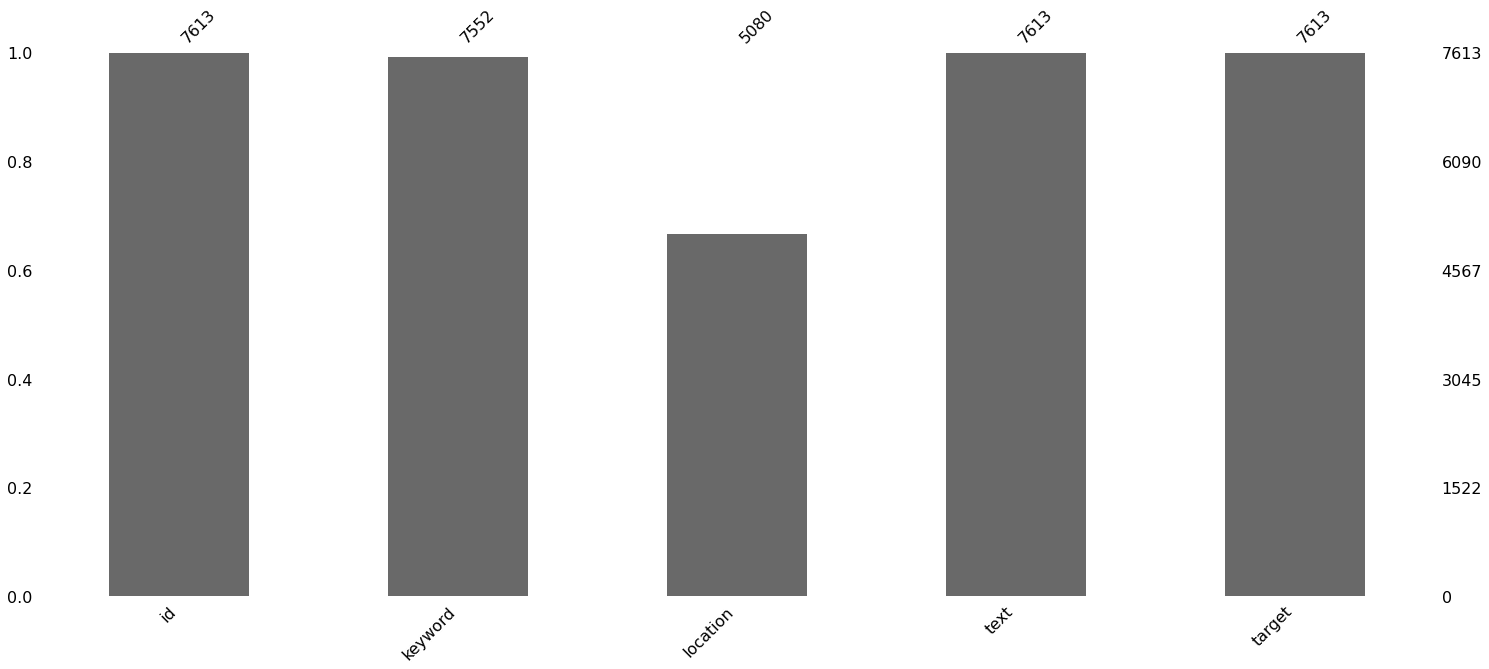

In [8]:
msno.bar(data)

<AxesSubplot:>

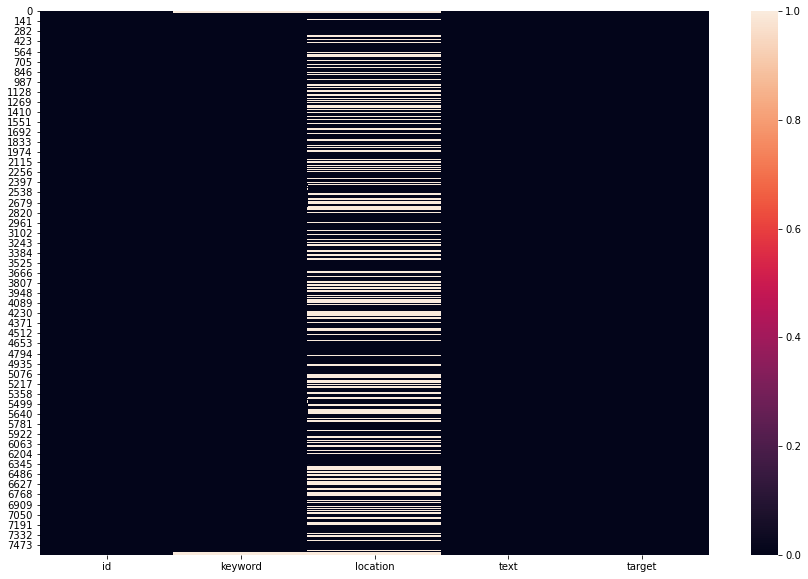

In [11]:
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(data.isnull())

In [12]:
data['target'].value_counts()/data.shape[0]

0    0.57034
1    0.42966
Name: target, dtype: float64

57% of the tweets are fake and 43% of tweets are real

Since we are dealing with text data,  lets clean our data in text column

In [13]:
import re

In [17]:
stop_words = []

with open("stopwords_en.txt","r") as sw:
    stop_words = sw.read()
    
stop_words = stop_words.split("\n")

def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower()
    i = re.sub("[0-9" "]+"," ",i)
    w = []
    for word in i.split(" "):
        if len(word)>3:
            w.append(word)
    return(" ".join(w))

Lets copy our data as df and apply these data cleaning techniques

In [18]:
df = data.copy()

In [19]:
df['formated_text'] = df['text'].apply(cleaning_text)

In [20]:
df.head()

,id,keyword,location,text,target,formated_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason this earthquake allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place being notified o...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just sent this photo from ruby alaska smoke fr...


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df_train, df_test = train_test_split(df,test_size=0.3)

In [40]:
print(df_train.shape, df_test.shape)

(5329, 6) (2284, 6)


In [31]:
def split_into_words(i):
    return[word for word in i.split(" ")]

In [32]:
df_bow = CountVectorizer(analyzer= split_into_words).fit(df['formated_text'])

In [33]:
df_bow

CountVectorizer(analyzer=<function split_into_words at 0x00000200069DB040>)

In [34]:
all_tweets_matrix = df_bow.transform(df.text)

In [35]:
all_tweets_matrix

<7613x19280 sparse matrix of type '<class 'numpy.int64'>'
	with 35170 stored elements in Compressed Sparse Row format>

In [38]:
df_train_matrix = df_bow.transform(df_train.text)

In [39]:
df_train_matrix

<5329x19280 sparse matrix of type '<class 'numpy.int64'>'
	with 24433 stored elements in Compressed Sparse Row format>

In [43]:
df_test_matrix = df_bow.transform(df_test.text)

In [44]:
df_test_matrix

<2284x19280 sparse matrix of type '<class 'numpy.int64'>'
	with 10737 stored elements in Compressed Sparse Row format>

In [50]:
tfidf_transformer = TfidfTransformer().fit(all_tweets_matrix)

In [51]:
tfidf_transformer 

TfidfTransformer()

In [53]:
train_tfidf = tfidf_transformer.transform(df_train_matrix)
train_tfidf.shape

(5329, 19280)

In [54]:
test_tfidf = tfidf_transformer.transform(df_test_matrix)
test_tfidf.shape

(2284, 19280)

In [56]:
from sklearn.naive_bayes import MultinomialNB as MB

In [58]:
classifier_mb = MB()
classifier_mb.fit(train_tfidf,df_train.target)

MultinomialNB()

In [59]:
test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m == df_test.target)
accuracy_test_m

0.7241681260945709

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(test_pred_m, df_test.target)

0.7241681260945709

In [62]:
pd.crosstab(test_pred_m,df_test.target)

target,0,1
row_0,,
0,1210,527
1,103,444


In [63]:
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m == df_train.target)
accuracy_train_m

0.8213548508162882

From training we got the accuracy of 72% and when we used it on our testing dataset we got accuracy of 82%

We will use little bit of smoothing process to see if accuracy increases

We will use Alpha as 2

In [64]:
classifier_mb_al1 = MB(alpha=2)

In [65]:
classifier_mb_al1.fit(train_tfidf,df_train.target)


MultinomialNB(alpha=2)

In [66]:
test_pred_al1 = classifier_mb_al1.predict(test_tfidf)
accuracy_score(test_pred_al1,df_test.target)

0.7219789842381786

In [67]:
classifier_mb_al2 = MB(alpha=3)

In [68]:
classifier_mb_al2.fit(train_tfidf,df_train.target)

MultinomialNB(alpha=3)

In [69]:
test_pred_al2 = classifier_mb_al2.predict(test_tfidf)
accuracy_score(test_pred_al2,df_test.target)

0.712784588441331

In [73]:
classifier_mb_al0 = MB(alpha=4)

In [74]:
classifier_mb_al0.fit(train_tfidf,df_train.target)

MultinomialNB(alpha=4)

In [75]:
test_pred_al0 = classifier_mb_al0.predict(test_tfidf)
accuracy_score(test_pred_al0,df_test.target)

0.7092819614711033

As we can see we get best accuracy using default alpha.

Based on the above model, we can go back and inform our clients that we can 82% sucessfully identify whether the tweet is fake or real. Of course this is not the ideal model, we can improve on this as we will start getting more and more data